In [35]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('m111.csv')

In [37]:
df.dropna(inplace=True)

In [38]:
df = df.set_index(['Date'])

In [39]:
df.index = pd.to_datetime(df.index)
#df = df['icici'][1:100]

In [40]:
df.head()

,icici,kotak,hdfc
Date,,,
2001-08-20,21.581800,2.1500,23.520000
2001-08-21,21.472700,2.1500,23.510000
2001-08-23,20.572701,2.1500,23.510000
2001-08-24,20.836399,2.1500,23.584999
2001-08-27,21.063601,2.1625,23.490000


<AxesSubplot:xlabel='Date'>

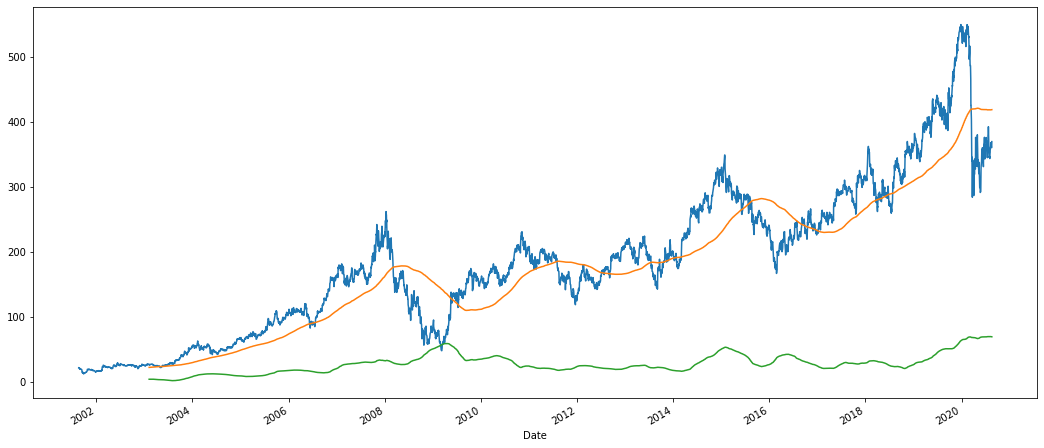

In [41]:
df['icici'].plot()
df['icici'].rolling(window=365).mean().plot()
df['icici'].rolling(window=365).std().plot()

In [51]:
y = df['icici'].resample('MS').mean()

In [52]:
y.dropna(inplace=True)

In [53]:
y = y[1:100]

In [54]:
y

Date
2001-09-01     16.453110
2001-10-01     15.601370
2001-11-01     18.810920
2001-12-01     16.759353
2002-01-01     16.653757
                 ...    
2009-07-01    130.902783
2009-08-01    135.239381
2009-09-01    149.078500
2009-10-01    163.055051
2009-11-01    160.445850
Freq: MS, Name: icici, Length: 99, dtype: float64

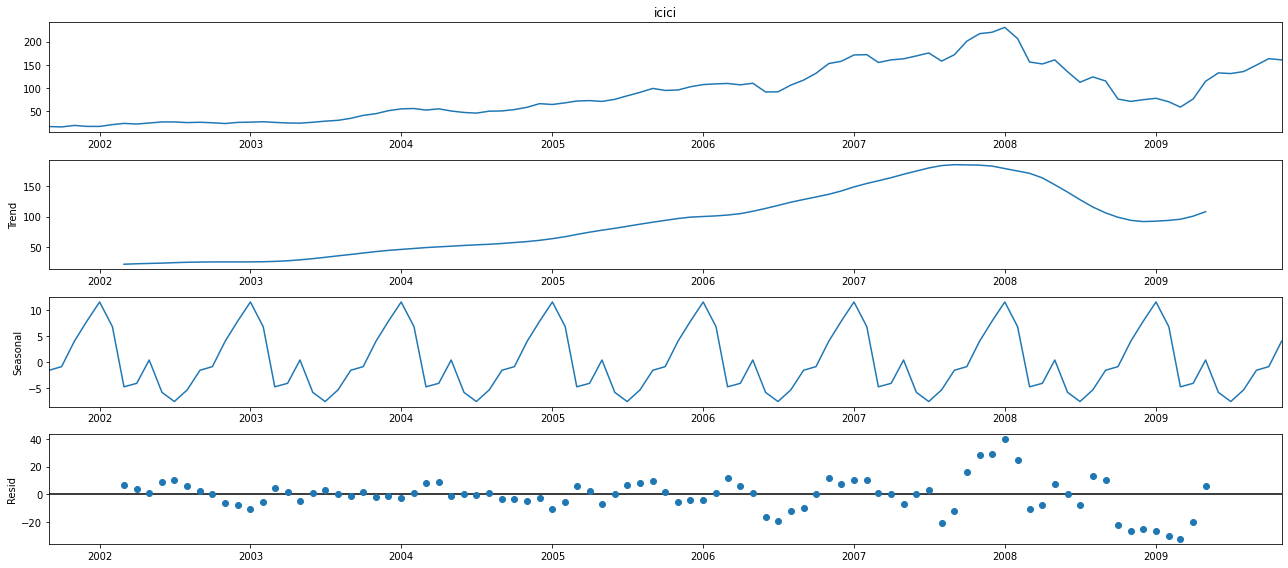

In [12]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [13]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(y, nlags=20)
lag_pacf = pacf(y, nlags=20, method='ols')

C:\Users\User-1\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


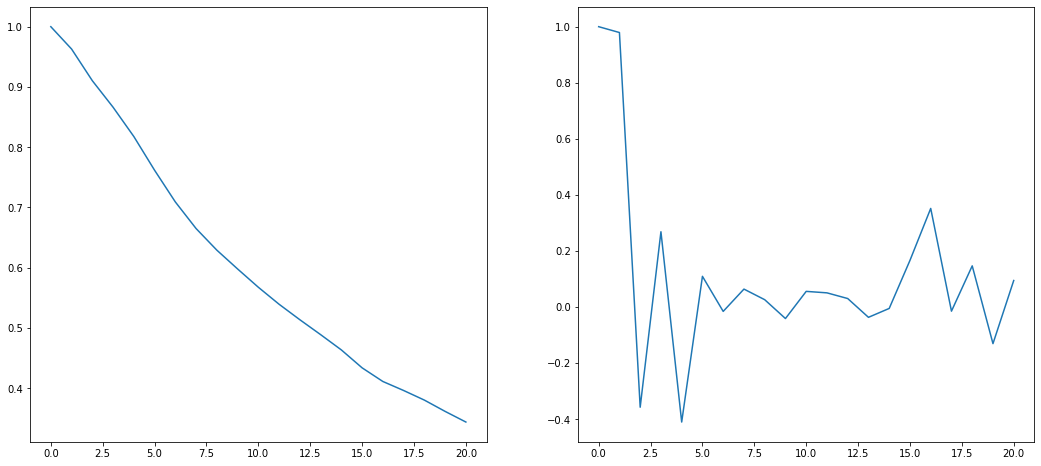

In [14]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.subplot(122) 
plt.plot(lag_pacf)

In [15]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [16]:
model = sm.tsa.statespace.SARIMAX(y , order=(2, 1, 2),seasonal_order=(1,1,1,12))
res = model.fit()

In [31]:
a = res.predict(start=96 , end = 140 , dynamic = True)

In [32]:
a

2009-09-01    145.329603
2009-10-01    147.435909
2009-11-01    153.827376
2009-12-01    159.452137
2010-01-01    165.408017
2010-02-01    158.761903
2010-03-01    141.786169
2010-04-01    144.541212
2010-05-01    153.998529
2010-06-01    150.097636
2010-07-01    146.134827
2010-08-01    149.533630
2010-09-01    154.062738
2010-10-01    151.778239
2010-11-01    157.765033
2010-12-01    162.278931
2011-01-01    168.145067
2011-02-01    161.552466
2011-03-01    145.008268
2011-04-01    149.629101
2011-05-01    162.512735
2011-06-01    161.164282
2011-07-01    157.539177
2011-08-01    161.048453
2011-09-01    166.226875
2011-10-01    164.471430
2011-11-01    170.504703
2011-12-01    175.148402
2012-01-01    181.027257
2012-02-01    174.427617
2012-03-01    157.831887
2012-04-01    162.231800
2012-05-01    174.708584
2012-06-01    173.057193
2012-07-01    169.392124
2012-08-01    172.888220
2012-09-01    177.989591
2012-10-01    176.171384
2012-11-01    182.199122
2012-12-01    186.827422


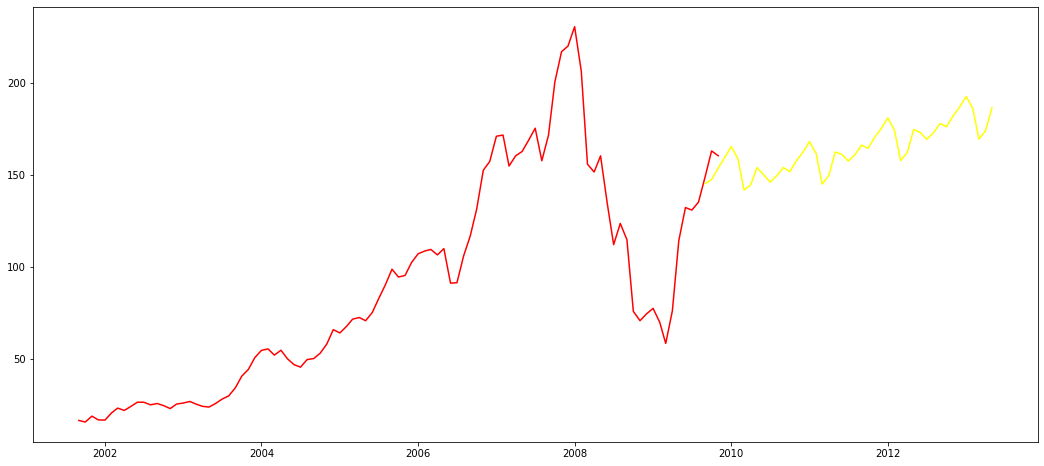

In [33]:
plt.plot(y , color='red')
plt.plot(a , color='yellow')

<AxesSubplot:>

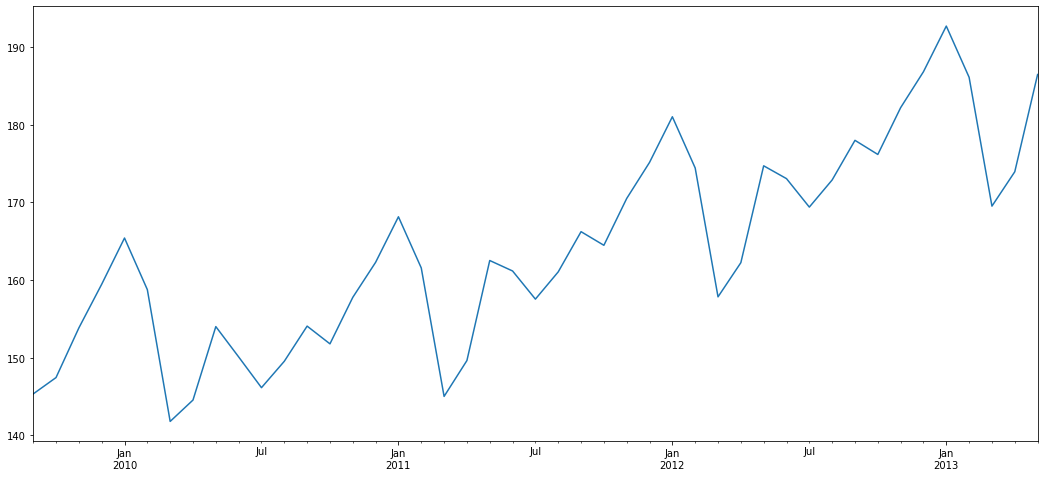

In [34]:
a.plot()

In [42]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

NameError: name 'results_AR' is not defined

In [36]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2001-08-21    0.000607
2001-08-23    0.000833
2001-08-24   -0.001387
2001-08-27    0.001476
2001-08-28    0.003373
dtype: float64


In [38]:
predictions_ARIMA_log = pd.Series(log_df.ix[0], index=log_df.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\User-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2001-08-20    3.071850
2001-08-21    3.072457
2001-08-23    3.072683
2001-08-24    3.070463
2001-08-27    3.073327
dtype: float64

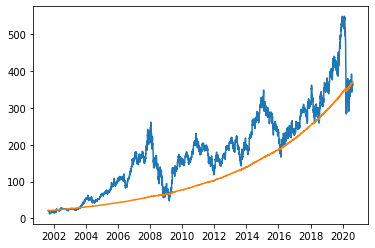

In [39]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

In [40]:
predictions_ARIMA.tail()

Date
2020-08-12    369.633836
2020-08-13    369.543082
2020-08-14    369.815971
2020-08-17    369.736211
2020-08-18    369.940162
dtype: float64